In [2]:
import yfinance as yf
import pandas as pd 
from datetime import datetime, timedelta
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [3]:
!pwd

/Users/ale/Desktop/visualstudio/ciencias de datos/pi_2024


In [46]:
economics = pd.read_excel('Economics.xlsx')

In [47]:
economics.head()

,Date,GDP CQOQ Index (L1),CPI YOY Index (R1),USURTOT Index (R1)
0,2019-05-01,NaN,1.8,3.6
1,2019-06-01,3.4,1.6,3.6
2,2019-07-01,NaN,1.8,3.7
3,2019-08-01,NaN,1.7,3.6
4,2019-09-01,4.6,1.7,3.5


In [48]:
economics['Date'] = pd.to_datetime(economics['Date'], format='%d/%m/%y')

In [49]:
economics.fillna(method='bfill', inplace=True)

/var/folders/_y/12sgjd4s7rg6nd87yc840f480000gn/T/ipykernel_54633/1687517595.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  economics.fillna(method='bfill', inplace=True)


In [50]:
economics.head(12)

,Date,GDP CQOQ Index (L1),CPI YOY Index (R1),USURTOT Index (R1)
0,2019-05-01,3.4,1.8,3.6
1,2019-06-01,3.4,1.6,3.6
2,2019-07-01,4.6,1.8,3.7
3,2019-08-01,4.6,1.7,3.6
4,2019-09-01,4.6,1.7,3.5
5,2019-10-01,2.6,1.8,3.6
6,2019-11-01,2.6,2.1,3.6
7,2019-12-01,2.6,2.3,3.6
8,2020-01-01,-5.3,2.5,3.6
9,2020-02-01,-5.3,2.3,3.5


In [51]:
economics.columns = ['Date', 'gdp', 'cpi', 'unemployment_rate']

In [52]:
economics.shape

(59, 4)

In [53]:
economics.head()

,Date,gdp,cpi,unemployment_rate
0,2019-05-01,3.4,1.8,3.6
1,2019-06-01,3.4,1.6,3.6
2,2019-07-01,4.6,1.8,3.7
3,2019-08-01,4.6,1.7,3.6
4,2019-09-01,4.6,1.7,3.5


In [55]:
economics['Date'] = pd.to_datetime(economics['Date'])

In [57]:
economics.set_index('Date', inplace=True)

In [62]:
sofr = pd.read_excel('Economics.xlsx', sheet_name='sofr')

In [63]:
sofr.head()

,Date,Últ precio
0,2019-05-01,2.4062
1,2019-05-02,2.4173
2,2019-05-03,2.4182
3,2019-05-06,2.4036
4,2019-05-07,2.3968


In [66]:
sofr['Date'] = pd.to_datetime(sofr['Date'])

In [68]:
sofr.set_index('Date', inplace=True)

In [71]:
sofr.dtypes

Últ precio    float64
dtype: object

# Como trabajaremos con datos diarios en los modelos, se debe hacer un ajuste para que los datos que esten mensuales sean en escala diaria.

In [58]:

rango_fechas = pd.date_range(start='2019-05-01', end= '2024-03-01', freq='D')


df_diario = economics.reindex(rango_fechas, method='ffill')

df_diario


,gdp,cpi,unemployment_rate
2019-05-01,3.4,1.8,3.6
2019-05-02,3.4,1.8,3.6
2019-05-03,3.4,1.8,3.6
2019-05-04,3.4,1.8,3.6
2019-05-05,3.4,1.8,3.6
...,...,...,...
2024-02-26,1.6,3.2,3.9
2024-02-27,1.6,3.2,3.9
2024-02-28,1.6,3.2,3.9
2024-02-29,1.6,3.2,3.9


In [ ]:
sofr = pd.read_excel('Economics')

In [59]:
economics.to_csv('economics_clean.csv', index = True)

Instalar acciones

In [652]:
import yfinance as yf
import pandas as pd

# Lista de tickers de las acciones a consultar
tickers = [
    "LYB", "AXP", "VZ", "AVGO", "BA", "ABBV", "CAT", "JPM", "CVX", "KO", 'SPY', "TSLA", "BTC"
]

# Fecha de inicio y fin para los datos
start_date = "2019-05-01"
end_date = "2024-03-01"

# Descargar datos de precios mensuales
data = yf.download(tickers, start=start_date, end=end_date, interval="1mo")

# Mostrar los primeros registros para revisar
print(data.head())



[**********************85%%***************       ]  11 of 13 completed

[*********************100%%**********************]  13 of 13 completed

Price       Adj Close                                                      \
Ticker           ABBV        AVGO         AXP          BA BTC         CAT   
Date                                                                        
2019-05-01  61.133602  214.194260  106.942947  333.608917 NaN  106.516235   
2019-06-01  57.953785  245.024399  115.081825  357.526611 NaN  121.167686   
2019-07-01  53.092422  249.204071  115.948860  335.103210 NaN  117.060280   
2019-08-01  53.190010  242.887802  112.570625  357.605194 NaN  106.610176   
2019-09-01  61.264786  237.241898  110.616074  376.025269 NaN  113.159065   

Price                                                     ...     Volume      \
Ticker             CVX         JPM         KO        LYB  ...         BA BTC   
Date                                                      ...                  
2019-05-01   91.293297   91.390678  42.059898  55.116093  ...  102803500 NaN   
2019-06-01  100.766899   96.427696  43.592300  63.934673  ...  

In [653]:
prices = data['Adj Close'].resample('M').last()

/var/folders/_y/12sgjd4s7rg6nd87yc840f480000gn/T/ipykernel_90295/2685812467.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  prices = data['Adj Close'].resample('M').last()


In [654]:
prices.shape

(58, 13)

In [655]:
returns = data['Adj Close'].pct_change()

/var/folders/_y/12sgjd4s7rg6nd87yc840f480000gn/T/ipykernel_90295/3247201694.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data['Adj Close'].pct_change()


In [656]:
prices.head()

Ticker,ABBV,AVGO,AXP,BA,BTC,CAT,CVX,JPM,KO,LYB,SPY,TSLA,VZ
Date,,,,,,,,,,,,,
2019-05-31,61.133602,214.194260,106.942947,333.608917,NaN,106.516235,91.293297,91.390678,42.059898,55.116093,254.007767,12.344000,41.701160
2019-06-30,57.953785,245.024399,115.081825,357.526611,NaN,121.167686,100.766899,96.427696,43.592300,63.934673,270.368195,14.897333,43.834179
2019-07-31,53.092422,249.204071,115.948860,335.103210,NaN,117.060280,99.689919,100.050186,45.407948,62.945923,275.790924,16.107332,42.407051
2019-08-31,53.190010,242.887802,112.570625,357.605194,NaN,106.610176,95.325272,95.425262,47.487244,58.199955,271.173248,15.040667,45.094193
2019-09-30,61.264786,237.241898,110.616074,376.025269,NaN,113.159065,97.025146,102.226463,46.969578,67.293228,275.178925,16.058001,46.799950


In [657]:
returns.head()

Ticker,ABBV,AVGO,AXP,BA,BTC,CAT,CVX,JPM,KO,LYB,SPY,TSLA,VZ
Date,,,,,,,,,,,,,
2019-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-01,-0.052014,0.143935,0.076105,0.071694,NaN,0.137551,0.103771,0.055115,0.036434,0.160000,0.064409,0.206848,0.051150
2019-07-01,-0.083883,0.017058,0.007534,-0.062718,NaN,-0.033899,-0.010688,0.037567,0.041651,-0.015465,0.020057,0.081223,-0.032557
2019-08-01,0.001838,-0.025346,-0.029136,0.067149,NaN,-0.089271,-0.043782,-0.046226,0.045791,-0.075398,-0.016743,-0.066222,0.063365
2019-09-01,0.151810,-0.023245,-0.017363,0.051510,NaN,0.061428,0.017832,0.071273,-0.010901,0.156242,0.014772,0.067639,0.037827


# Descargar Twitter Database

In [658]:
df = pd.read_excel('Economics.xlsx', sheet_name='TWT Sentiment')

In [659]:
df.head()

,Unnamed: 0,LYB UN Equity,Unnamed: 2,Unnamed: 3,AXP UN Equity,Unnamed: 5,Unnamed: 6,VZ UN Equity,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,JPM UN Equity,Unnamed: 23,Unnamed: 24,CVX UN Equity,Unnamed: 26,Unnamed: 27,KO UN Equity,Unnamed: 29,Unnamed: 30
0,Dates,Twitter Sentiment Daily Average,Twitter Negative Sentiment Count,Twitter Positive Sentiment Count,Twitter Sentiment Daily Average,Twitter Negative Sentiment Count,Twitter Positive Sentiment Count,Twitter Sentiment Daily Average,Twitter Negative Sentiment Count,Twitter Positive Sentiment Count,...,Twitter Positive Sentiment Count,Twitter Sentiment Daily Average,Twitter Negative Sentiment Count,Twitter Positive Sentiment Count,Twitter Sentiment Daily Average,Twitter Negative Sentiment Count,Twitter Positive Sentiment Count,Twitter Sentiment Daily Average,Twitter Negative Sentiment Count,Twitter Positive Sentiment Count
1,2019-04-01 00:00:00,0.4635,1,6,-0.0241,5,4,0.0037,1,3,...,6,0.0334,11,27,-0.0209,29,20,0.0104,2,3
2,2019-05-01 00:00:00,0.1435,1,7,-0.0042,2,2,-0.0768,18,12,...,3,-0.036,36,14,-0.0376,15,11,-0.0001,1,1
3,2019-06-01 00:00:00,0,1,1,0.0046,1,1,0.0033,2,4,...,5,0.0796,11,33,0.0202,3,6,0,2,2
4,2019-07-01 00:00:00,0,1,1,-0.041,5,1,0.0302,4,13,...,4,-0.0327,16,6,0.002,2,3,-0.0011,1,1


In [660]:
tickers = ["LYB UN Equity", "AXP UN Equity", "VZ UN Equity", "AVGO UW Equity", "BA UN Equity",
           "SOLV UN Equity", "CAT UN Equity", "JPM UN Equity", "CVX UN Equity", "KO UN Equity"]

In [661]:
df.columns

Index(['Unnamed: 0', 'LYB UN Equity', 'Unnamed: 2', 'Unnamed: 3',
       'AXP UN Equity', 'Unnamed: 5', 'Unnamed: 6', 'VZ UN Equity',
       'Unnamed: 8', 'Unnamed: 9', 'AVGO UW Equity', 'Unnamed: 11',
       'Unnamed: 12', 'BA UN Equity', 'Unnamed: 14', 'Unnamed: 15',
       'SOLV UN Equity', 'Unnamed: 17', 'Unnamed: 18', 'CAT UN Equity',
       'Unnamed: 20', 'Unnamed: 21', 'JPM UN Equity', 'Unnamed: 23',
       'Unnamed: 24', 'CVX UN Equity', 'Unnamed: 26', 'Unnamed: 27',
       'KO UN Equity', 'Unnamed: 29', 'Unnamed: 30'],
      dtype='object')

In [662]:
organized_data = pd.DataFrame()

In [663]:
if 'Dates' in df.iloc[0].values:
    df.columns = df.iloc[0]
    df = df[1:]

In [664]:
# Crear un nuevo DataFrame con nombres de columnas limpios
new_columns = []
for ticker in tickers:
    new_columns.extend([
        f'{ticker} Twitter Sentiment Daily Average', 
        f'{ticker} Twitter Negative Sentiment Count',
        f'{ticker} Twitter Positive Sentiment Count'
    ])

# Asignar nuevos nombres de columna
df.columns = ['Dates'] + new_columns

# Convertir 'Dates' a datetime y establecer como índice
df['Dates'] = pd.to_datetime(df['Dates'])
df.set_index('Dates', inplace=True)

# Mostrar el DataFrame reestructurado
df.head

<bound method NDFrame.head of            LYB UN Equity Twitter Sentiment Daily Average  \
Dates                                                      
2019-04-01                                        0.4635   
2019-05-01                                        0.1435   
2019-06-01                                             0   
2019-07-01                                             0   
2019-08-01                                        0.1455   
2019-09-01                                        0.0164   
2019-10-01                                        0.0048   
2019-11-01                                        0.1271   
2019-12-01                                       -0.0424   
2020-01-01                                       -0.2585   
2020-02-01                                        0.3034   
2020-03-01                                       -0.0344   
2020-04-01                                        0.4087   
2020-05-01                                       -0.0145   
2020-06-01

In [665]:
df.head()

,LYB UN Equity Twitter Sentiment Daily Average,LYB UN Equity Twitter Negative Sentiment Count,LYB UN Equity Twitter Positive Sentiment Count,AXP UN Equity Twitter Sentiment Daily Average,AXP UN Equity Twitter Negative Sentiment Count,AXP UN Equity Twitter Positive Sentiment Count,VZ UN Equity Twitter Sentiment Daily Average,VZ UN Equity Twitter Negative Sentiment Count,VZ UN Equity Twitter Positive Sentiment Count,AVGO UW Equity Twitter Sentiment Daily Average,...,CAT UN Equity Twitter Positive Sentiment Count,JPM UN Equity Twitter Sentiment Daily Average,JPM UN Equity Twitter Negative Sentiment Count,JPM UN Equity Twitter Positive Sentiment Count,CVX UN Equity Twitter Sentiment Daily Average,CVX UN Equity Twitter Negative Sentiment Count,CVX UN Equity Twitter Positive Sentiment Count,KO UN Equity Twitter Sentiment Daily Average,KO UN Equity Twitter Negative Sentiment Count,KO UN Equity Twitter Positive Sentiment Count
Dates,,,,,,,,,,,,,,,,,,,,,
2019-04-01,0.4635,1,6,-0.0241,5,4,0.0037,1,3,0.0045,...,6,0.0334,11,27,-0.0209,29,20,0.0104,2,3
2019-05-01,0.1435,1,7,-0.0042,2,2,-0.0768,18,12,-0.1408,...,3,-0.036,36,14,-0.0376,15,11,-0.0001,1,1
2019-06-01,0,1,1,0.0046,1,1,0.0033,2,4,0.0137,...,5,0.0796,11,33,0.0202,3,6,0,2,2
2019-07-01,0,1,1,-0.041,5,1,0.0302,4,13,-0.1576,...,4,-0.0327,16,6,0.002,2,3,-0.0011,1,1
2019-08-01,0.1455,1,2,-0.0049,1,5,0.0076,1,4,0.0535,...,4,0.0796,3,15,0.002,1,2,0.0021,3,1


In [666]:
df['JPM UN Equity Twitter Sentiment Daily Average'].head()

Dates
2019-04-01    0.0334
2019-05-01    -0.036
2019-06-01    0.0796
2019-07-01   -0.0327
2019-08-01    0.0796
Name: JPM UN Equity Twitter Sentiment Daily Average, dtype: object

In [667]:
tickers = ["LYB UN Equity", "AXP UN Equity", "VZ UN Equity", "AVGO UW Equity", "BA UN Equity",
           "SOLV UN Equity", "CAT UN Equity", "JPM UN Equity", "CVX UN Equity", "KO UN Equity"]

dfs = {}  # Diccionario para almacenar los DataFrames de cada acción
for ticker in tickers:
    # Asumiendo que las columnas están etiquetadas con el nombre de la acción
    action_columns = [col for col in df.columns if ticker in col]
    dfs[ticker] = df[action_columns]

# Ahora tienes un diccionario de DataFrames donde dfs['LYB UN Equity'] te da el DataFrame para LYB UN Equity


In [668]:
dfs['JPM UN Equity'].head()

,JPM UN Equity Twitter Sentiment Daily Average,JPM UN Equity Twitter Negative Sentiment Count,JPM UN Equity Twitter Positive Sentiment Count
Dates,,,
2019-04-01,0.0334,11,27
2019-05-01,-0.036,36,14
2019-06-01,0.0796,11,33
2019-07-01,-0.0327,16,6
2019-08-01,0.0796,3,15


In [669]:
JPM_sentiment = dfs['JPM UN Equity']

Organizar los datos de manera individual ya que su análisis se realizará de esta manera.

In [670]:
economics.shape, JPM_sentiment.shape, returns.shape

((60, 4), (60, 3), (58, 13))

In [671]:
combined_data = pd.concat([JPM_sentiment, returns['JPM'], returns['SPY'],economics['gdp']], axis=1).dropna()

In [672]:
combined_data.head()

,JPM UN Equity Twitter Sentiment Daily Average,JPM UN Equity Twitter Negative Sentiment Count,JPM UN Equity Twitter Positive Sentiment Count,JPM,SPY,gdp


# Pre procesamiento de datos

## revisión datos nulos 

1. con twitter sentiment

In [673]:
# revisando datos faltantes
df.isnull().sum()
miss_val = df.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

In [674]:

miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df.shape[0] * 100))
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val

,MissvalCount,Percent
SOLV UN Equity Twitter Sentiment Daily Average,59,98.33
SOLV UN Equity Twitter Positive Sentiment Count,59,98.33
SOLV UN Equity Twitter Negative Sentiment Count,59,98.33


faltantes de los precios

In [675]:
# revisando datos faltantes
prices.isnull().sum()
miss_val = prices.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=prices.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

In [676]:
prices.shape

(58, 13)

In [677]:
365 * 3

1095

In [678]:

# se agraga una nueva columna y cuenta y imprime el porcentaje de datos
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df.shape[0] * 100))
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val

,MissvalCount,Percent
Ticker,,
BTC,41,68.33


Faltantes de los retornos

In [679]:
# revisando datos faltantes
returns.isnull().sum()
miss_val = returns.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=returns.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

In [680]:

# se agraga una nueva columna y cuenta y imprime el porcentaje de datos
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df.shape[0] * 100))
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val

,MissvalCount,Percent
Ticker,,
BTC,18,30.00
ABBV,1,1.67
AVGO,1,1.67
AXP,1,1.67
BA,1,1.67
CAT,1,1.67
CVX,1,1.67
JPM,1,1.67
KO,1,1.67


Los datos nulos hacen referencia a la primera linea, donde no hay punto de comparación con t-1

In [681]:
returns = returns.dropna()

Revisión de outliers

In [682]:
import numpy as np

# Creando una copia de los datos para manipular sin afectar el original
returns_filtered = returns.copy()

for ticker in returns.columns:
    Q1 = returns[ticker].quantile(0.25)
    Q3 = returns[ticker].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrando los outliers y opcionalmente puedes reemplazarlos con NaN
    returns_filtered[ticker] = returns[ticker].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)


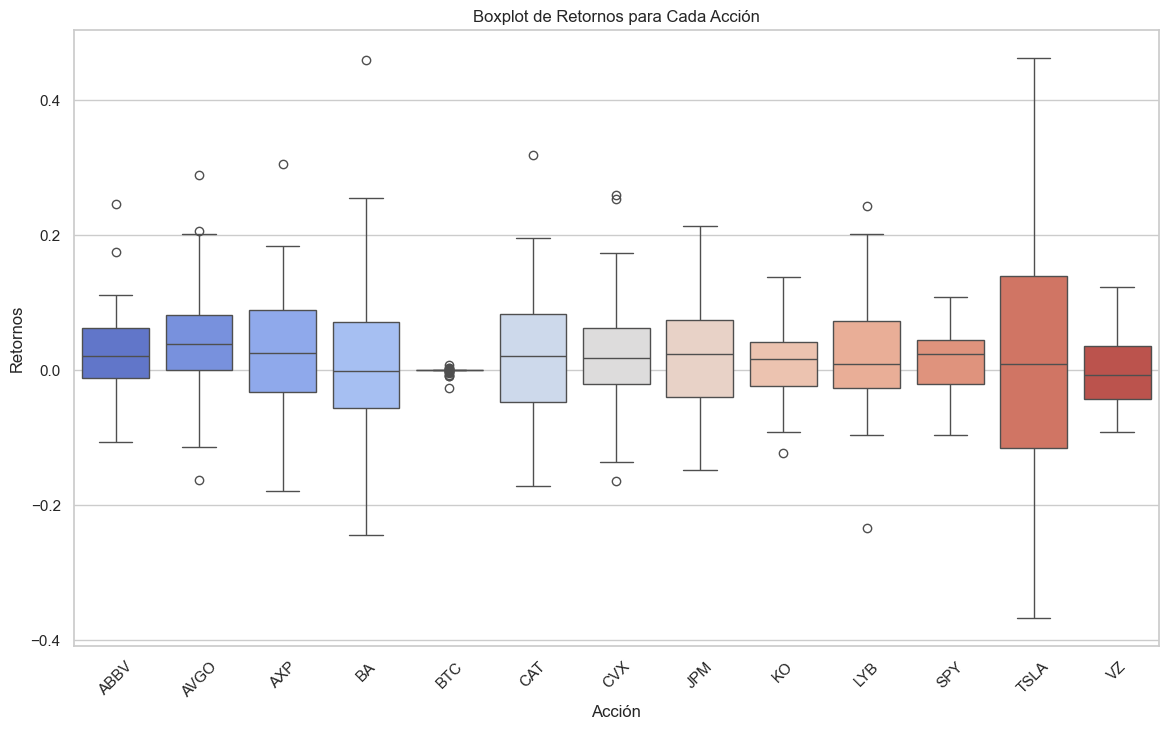

In [683]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el tamaño del gráfico y el estilo si deseas
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Crea un boxplot
sns.boxplot(data=returns, palette="coolwarm")
plt.title('Boxplot de Retornos para Cada Acción')
plt.xlabel('Acción')
plt.ylabel('Retornos')
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejor visualización
plt.show()


ANÁLISIS:

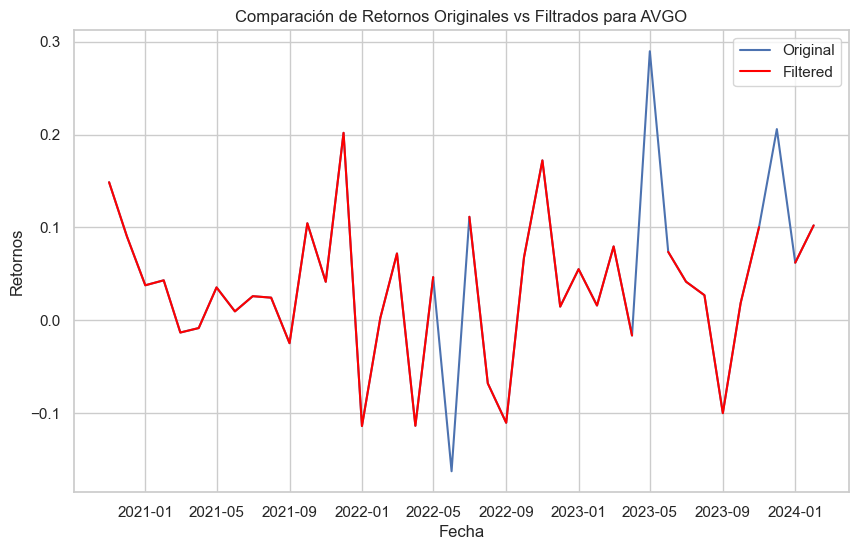

In [684]:
import matplotlib.pyplot as plt

# Visualizando los retornos filtrados para un ticker específico, por ejemplo, AVGO
plt.figure(figsize=(10, 6))
plt.plot(returns.index, returns['AVGO'], label='Original')
plt.plot(returns_filtered.index, returns_filtered['AVGO'], label='Filtered', color='red')
plt.title('Comparación de Retornos Originales vs Filtrados para AVGO')
plt.xlabel('Fecha')
plt.ylabel('Retornos')
plt.legend()
plt.show()


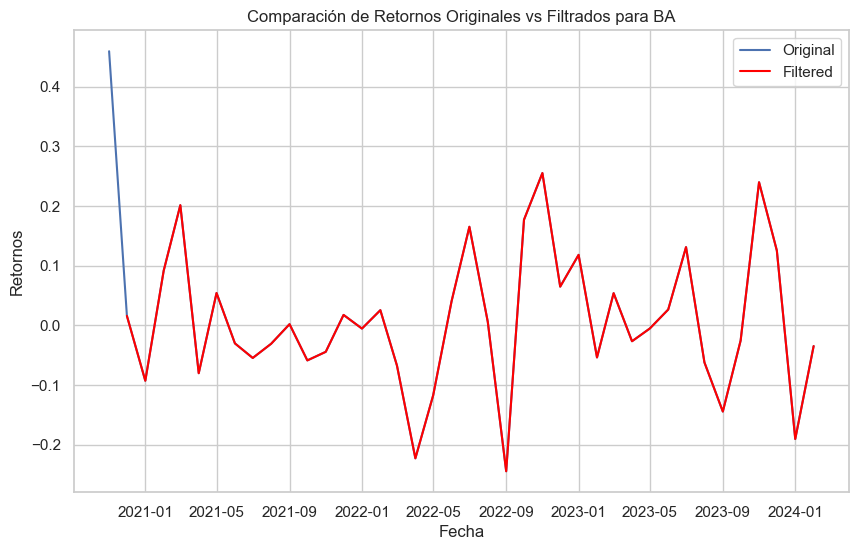

In [685]:
import matplotlib.pyplot as plt

# Visualizando los retornos filtrados para un ticker específico, por ejemplo, AVGO
plt.figure(figsize=(10, 6))
plt.plot(returns.index, returns['BA'], label='Original')
plt.plot(returns_filtered.index, returns_filtered['BA'], label='Filtered', color='red')
plt.title('Comparación de Retornos Originales vs Filtrados para BA')
plt.xlabel('Fecha')
plt.ylabel('Retornos')
plt.legend()
plt.show()

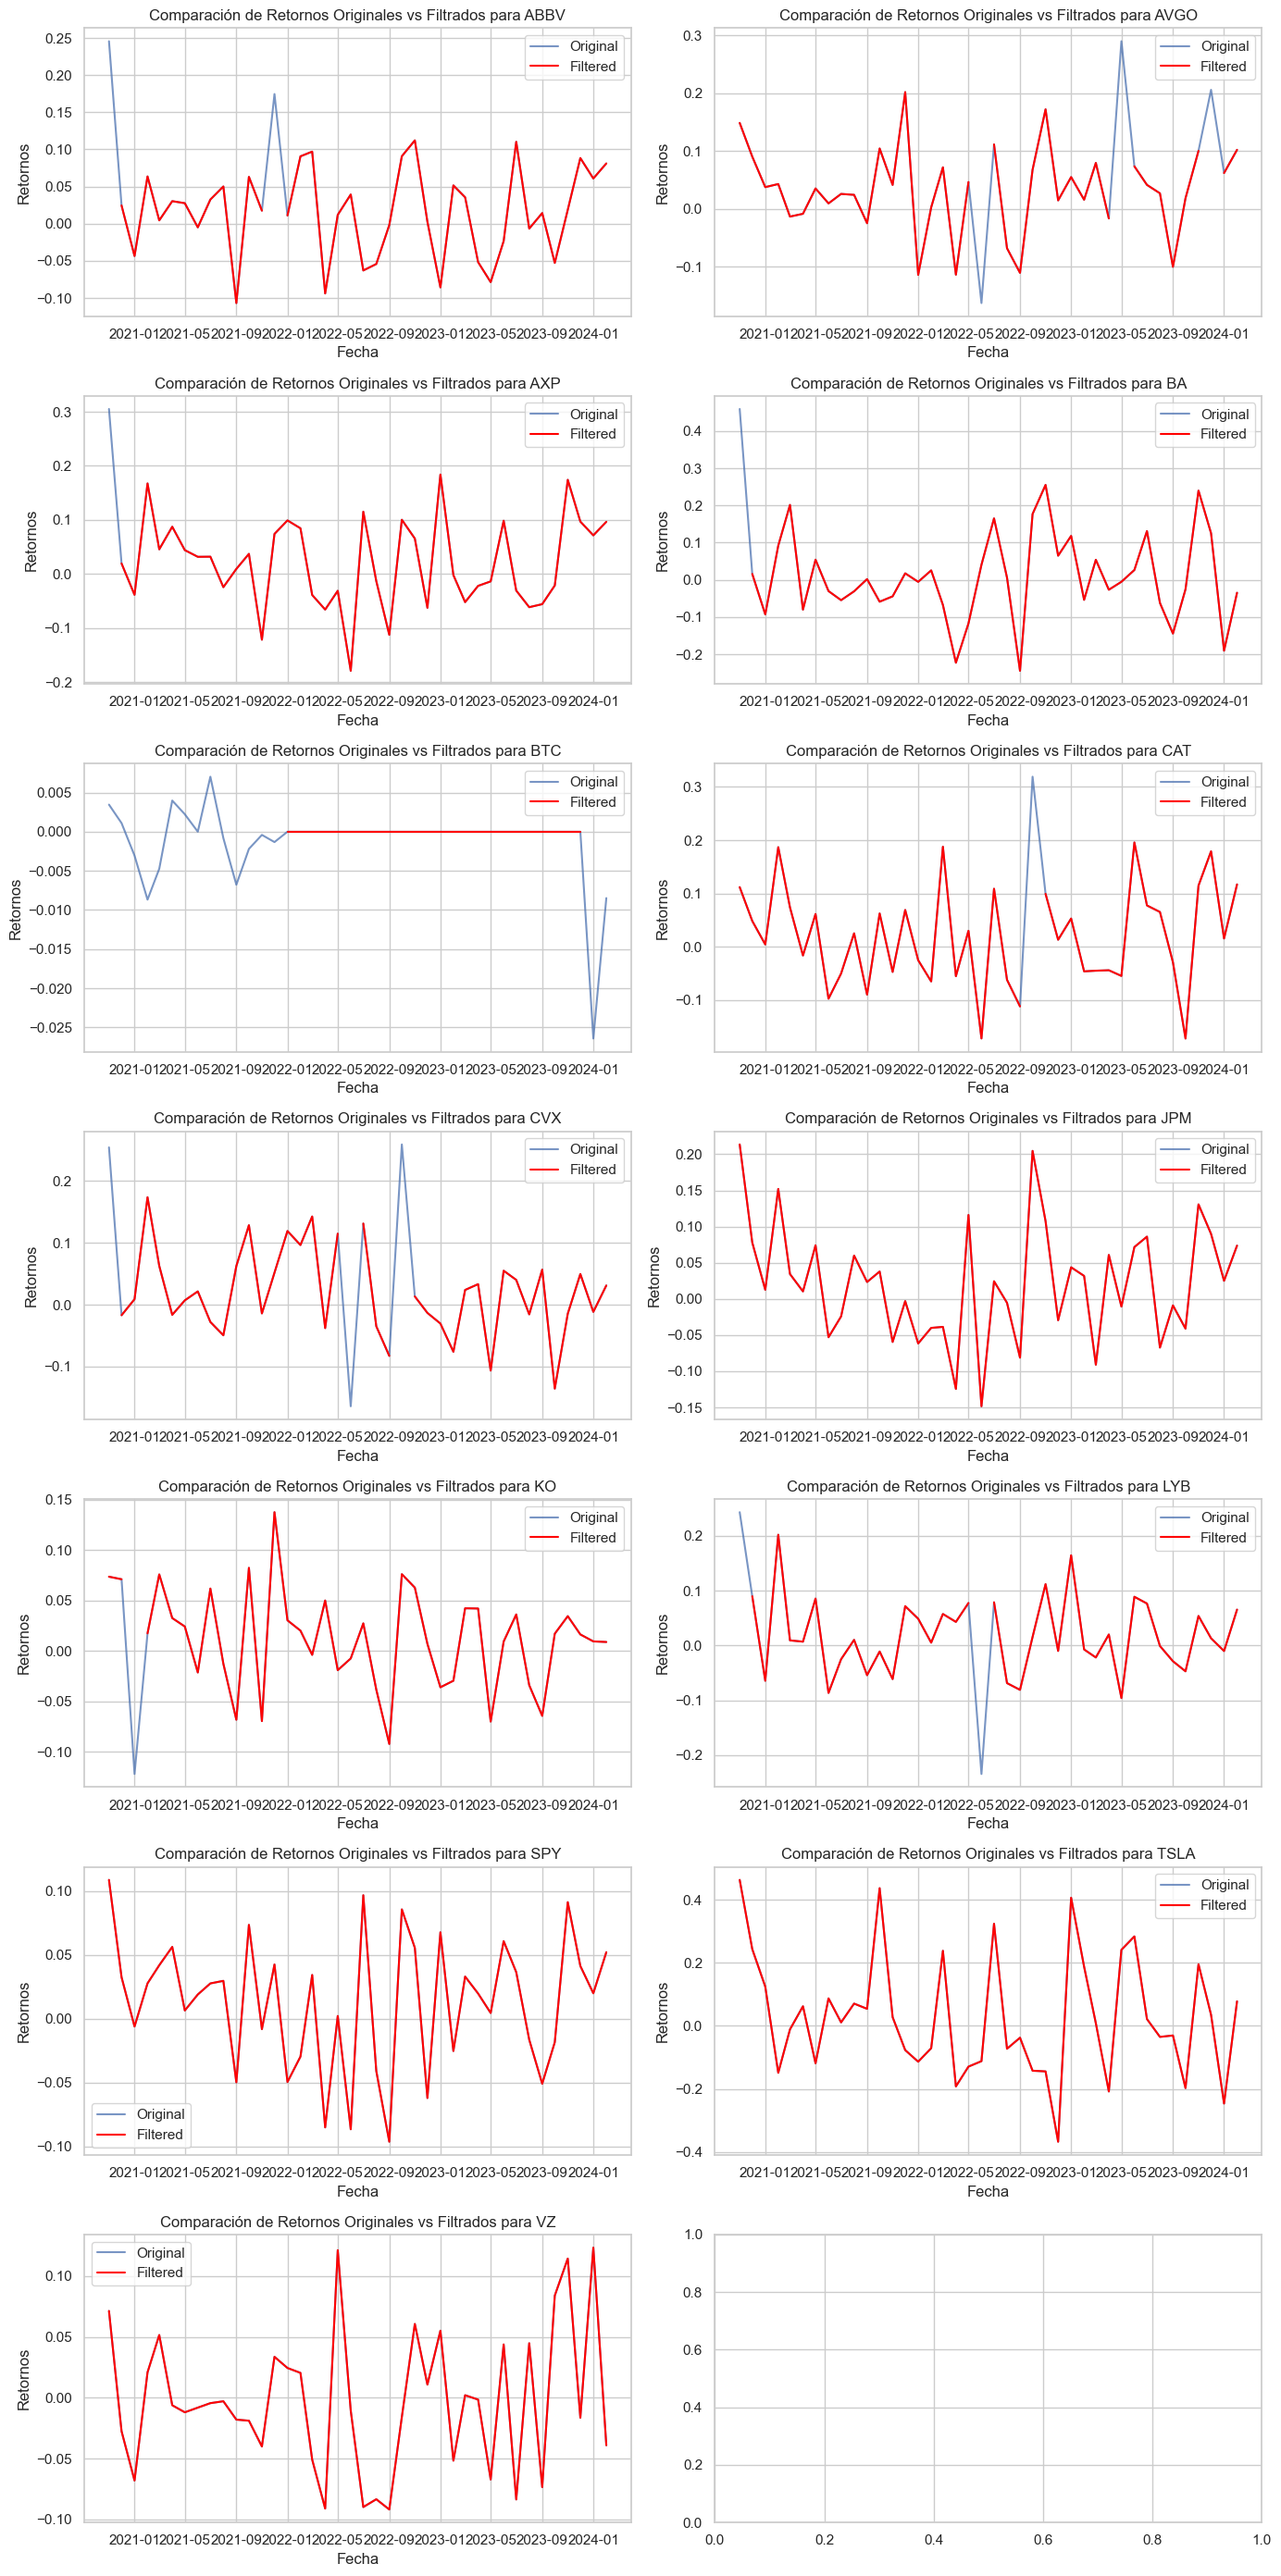

In [686]:
import matplotlib.pyplot as plt

# Lista de tickers que quieres analizar
tickers = returns.columns

# Cantidad de filas/columnas para los subgráficos
n_rows = (len(tickers) + 1) // 2
n_cols = 2

# Crea un objeto de figura y ejes
fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))

# Iterar sobre cada ticker y cada eje
for ax, ticker in zip(axs.flatten(), tickers):
    ax.plot(returns.index, returns[ticker], label='Original', alpha=0.75)
    ax.plot(returns_filtered.index, returns_filtered[ticker], label='Filtered', color='red')
    ax.set_title(f'Comparación de Retornos Originales vs Filtrados para {ticker}')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Retornos')
    ax.legend()

# Ajusta los subgráficos para evitar la superposición
plt.tight_layout()
plt.show()


# Teniendo en cuenta que contamos con datos muy completos, vamos a hacer el análisis descriptivo y exploratorio


In [687]:
# Suponiendo que 'returns' es tu DataFrame de retornos
summary_stats = returns.describe()
print(summary_stats)


Ticker       ABBV       AVGO        AXP         BA        BTC        CAT  \
count   40.000000  40.000000  40.000000  40.000000  40.000000  40.000000   
mean     0.024557   0.039720   0.027423   0.017006  -0.001127   0.026075   
std      0.072426   0.091863   0.093172   0.134888   0.004967   0.104740   
min     -0.106889  -0.162584  -0.178889  -0.244431  -0.026413  -0.171978   
25%     -0.010821  -0.000103  -0.032842  -0.055625  -0.000102  -0.047763   
50%      0.021620   0.039528   0.025706  -0.001609   0.000000   0.020547   
75%      0.063185   0.082210   0.089745   0.071619   0.000000   0.083149   
max      0.245642   0.289641   0.305188   0.459312   0.007026   0.319235   

Ticker        CVX        JPM         KO        LYB        SPY       TSLA  \
count   40.000000  40.000000  40.000000  40.000000  40.000000  40.000000   
mean     0.027206   0.021860   0.009484   0.018289   0.013656   0.028612   
std      0.091312   0.081574   0.053876   0.085765   0.051860   0.193946   
min     -0.

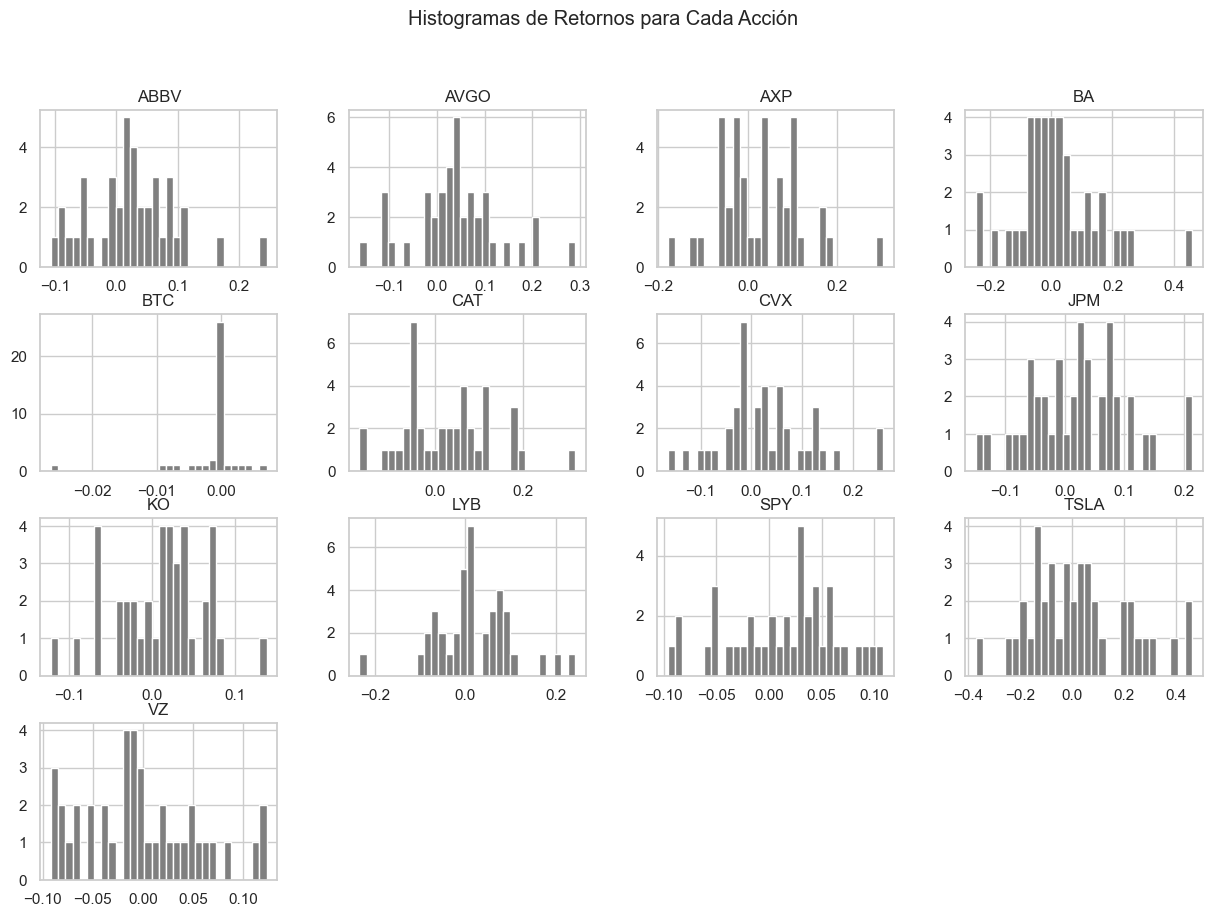

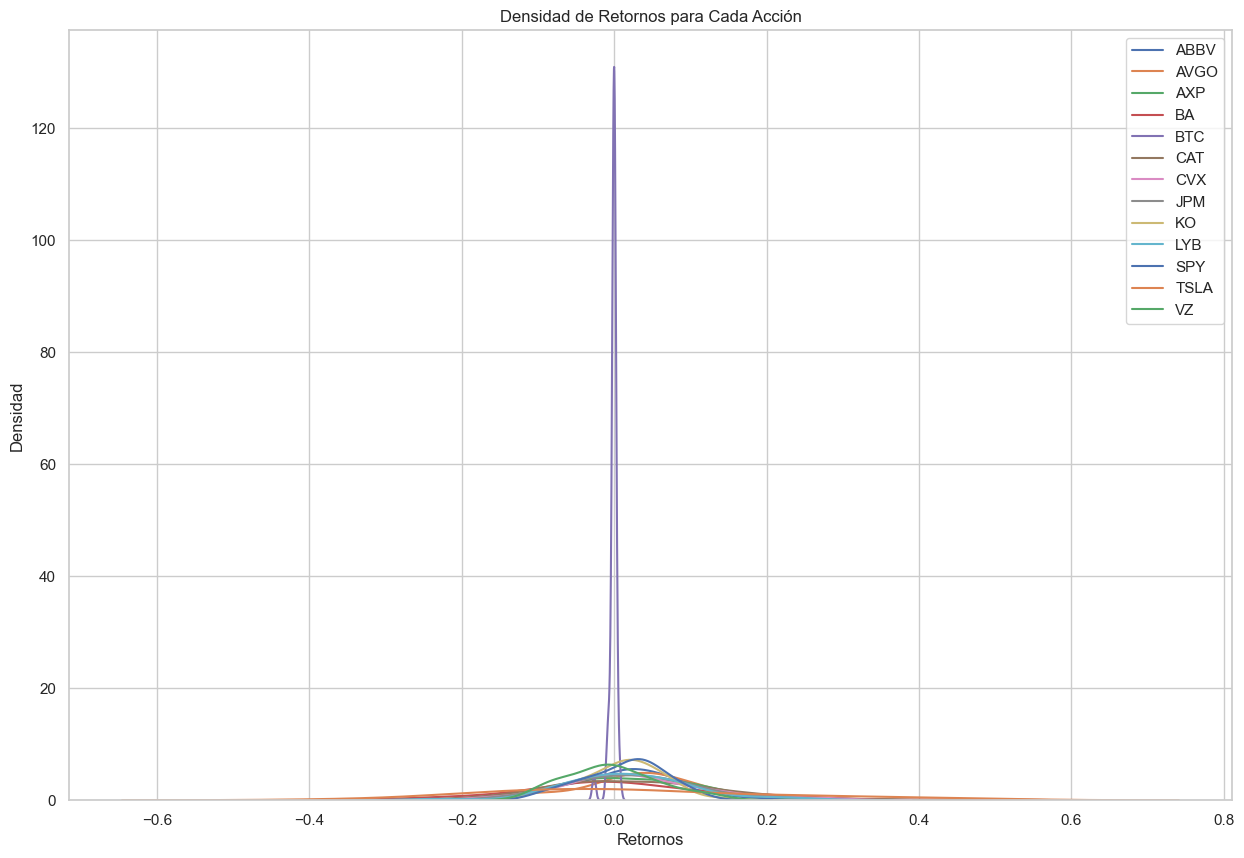

In [688]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando el estilo
sns.set(style="whitegrid")

# Crear histogramas para cada acción
returns.hist(bins=30, figsize=(15, 10), color='gray')
plt.suptitle('Histogramas de Retornos para Cada Acción')
plt.show()

# Gráficos de densidad
plt.figure(figsize=(15, 10))
for column in returns.columns:
    sns.kdeplot(returns[column], label=column)
plt.title('Densidad de Retornos para Cada Acción')
plt.xlabel('Retornos')
plt.ylabel('Densidad')
plt.legend()
plt.show()


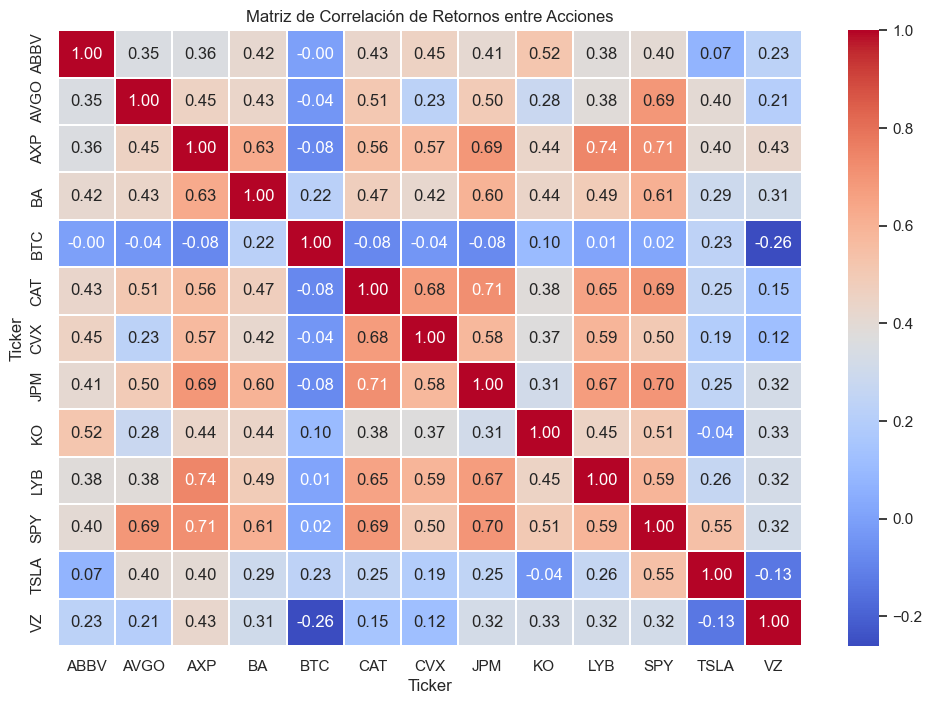

In [689]:
# Calculando la matriz de correlación
correlation_matrix = returns.corr()

# Visualizando la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Matriz de Correlación de Retornos entre Acciones')
plt.show()


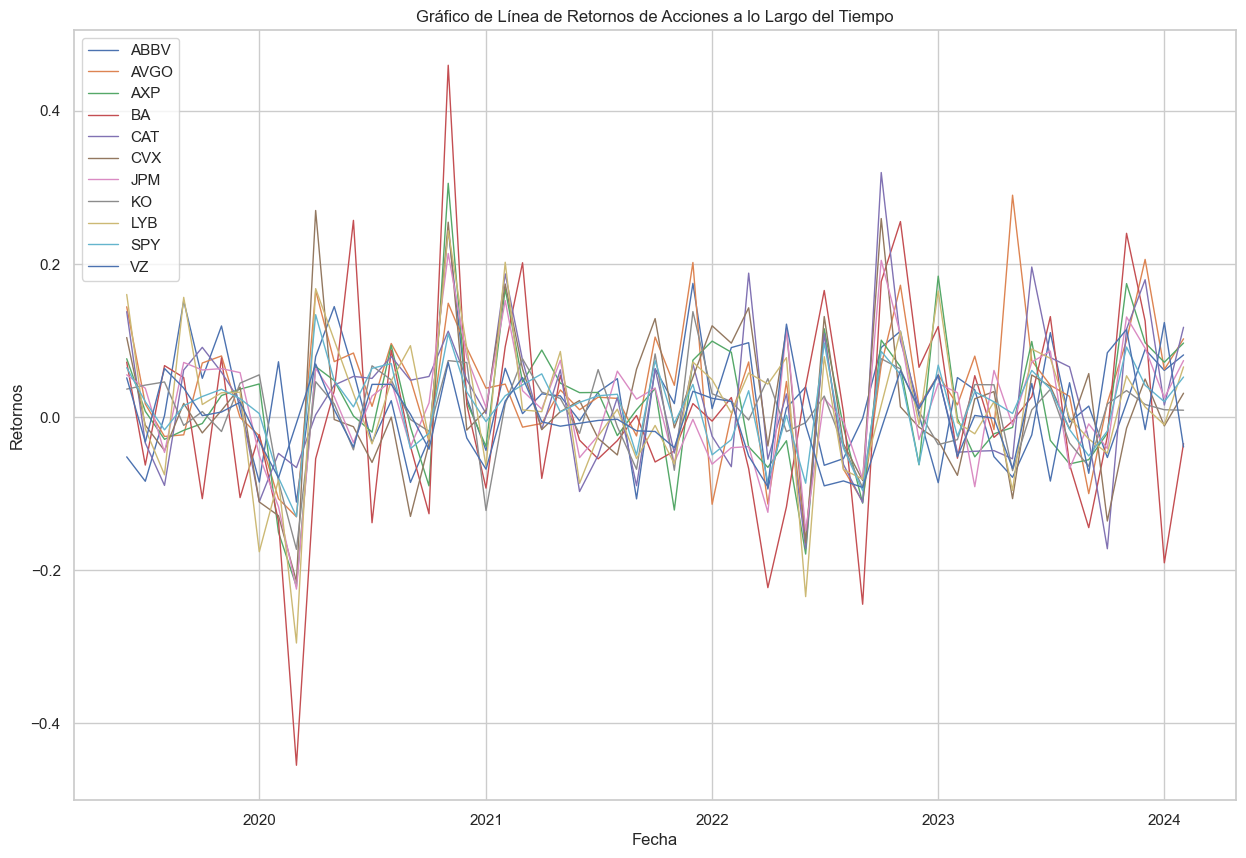

In [495]:
plt.figure(figsize=(15, 10))
for column in returns.columns:
    plt.plot(returns.index, returns[column], label=column, linewidth=1)
plt.title('Gráfico de Línea de Retornos de Acciones a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Retornos')
plt.legend()
plt.show()


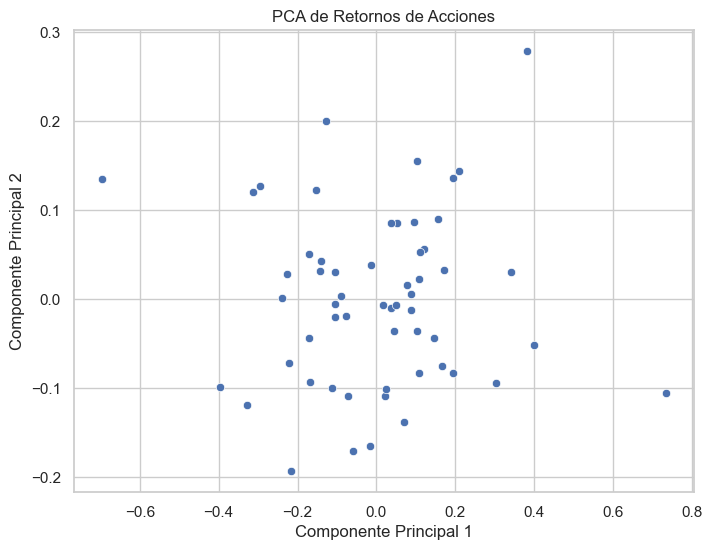

In [496]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(returns.fillna(0))
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Gráfico de dispersión de PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=principal_df)
plt.title('PCA de Retornos de Acciones')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

## Mirar el comportamiento individual de la variable

In [497]:
returns['JPM'].describe()

count    57.000000
mean      0.015667
std       0.080718
min      -0.224615
25%      -0.039126
50%       0.025044
75%       0.063205
max       0.213523
Name: JPM, dtype: float64

In [498]:
# Asumiendo que 'returns' es tu DataFrame y que tiene una columna llamada 'ABBV'
min_date = returns['JPM'].idxmin()
max_date = returns['JPM'].idxmax()

# Obtener los valores mínimos y máximos para confirmar
min_value = returns['JPM'].min()
max_value = returns['JPM'].max()

print("Fecha del valor mínimo:", min_date, "con un retorno de:", min_value)
print("Fecha del valor máximo:", max_date, "con un retorno de:", max_value)


Fecha del valor mínimo: 2020-03-01 00:00:00 con un retorno de: -0.22461456184377382
Fecha del valor máximo: 2020-11-01 00:00:00 con un retorno de: 0.21352348499780094


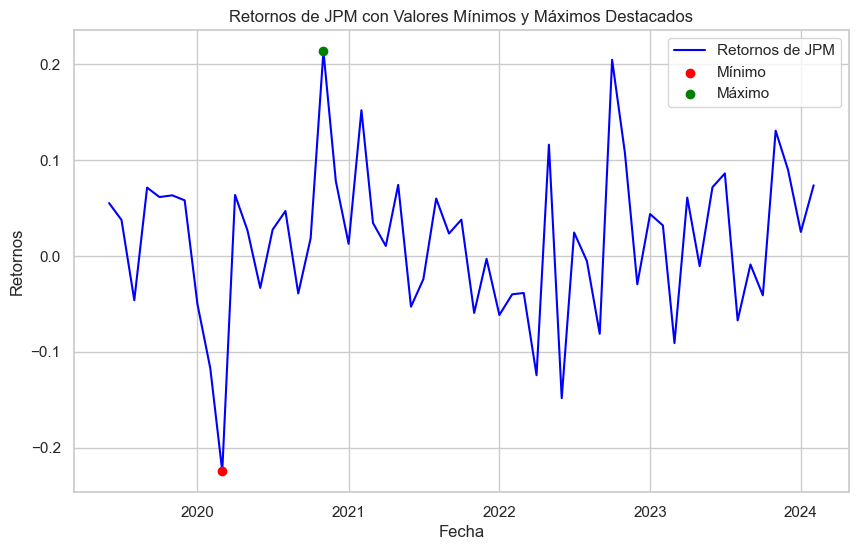

In [499]:
import matplotlib.pyplot as plt

# Crear un gráfico de los retornos de ABBV
plt.figure(figsize=(10, 6))
plt.plot(returns['JPM'], label='Retornos de JPM', color='blue')
plt.scatter(min_date, min_value, color='red', label='Mínimo', zorder=5)
plt.scatter(max_date, max_value, color='green', label='Máximo', zorder=5)
plt.title('Retornos de JPM con Valores Mínimos y Máximos Destacados')
plt.xlabel('Fecha')
plt.ylabel('Retornos')
plt.legend()
plt.grid(True)
plt.show()


# Aplicar modelo Garch

In [500]:
import pickle
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_arch
from statsmodels.compat import lzip
import statsmodels.api as sm
import pandas as pd
import numpy as np
from arch import arch_model

In [693]:
returns.columns

Index(['ABBV', 'AVGO', 'AXP', 'BA', 'BTC', 'CAT', 'CVX', 'JPM', 'KO', 'LYB',
       'SPY', 'TSLA', 'VZ'],
      dtype='object', name='Ticker')

## Acción JPM

Test arch

In [502]:
data_jpm = sm.add_constant(returns['JPM'])
results = sm.OLS(data_jpm['JPM'],data_jpm['const']).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    JPM   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 12 May 2024   Prob (F-statistic):                nan
Time:                        20:12:08   Log-Likelihood:                 63.082
No. Observations:                  57   AIC:                            -124.2
Df Residuals:                      56   BIC:                            -122.1
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0157      0.011      1.465      0.1

In [503]:
res = het_arch(results.resid, nlags=5)
name = ['lm','lmpval','fval','fpval']    
lzip(name,res)   

[('lm', 1.7463983126644762),
 ('lmpval', 0.8830032916573755),
 ('fval', 0.3197156808078542),
 ('fpval', 0.8985888864175837)]

In [504]:
am = arch_model(returns['JPM'], vol='GARCH')
res = am.fit()
print(res.summary())   


Iteration:      1,   Func. Count:      6,   Neg. LLF: 197.9883298469233
Iteration:      2,   Func. Count:     15,   Neg. LLF: 62.345621266540775
Iteration:      3,   Func. Count:     24,   Neg. LLF: -63.081943273334964
Iteration:      4,   Func. Count:     30,   Neg. LLF: -63.220484772359875
Iteration:      5,   Func. Count:     35,   Neg. LLF: -63.27464585869731
Iteration:      6,   Func. Count:     40,   Neg. LLF: -63.49727867028339
Iteration:      7,   Func. Count:     45,   Neg. LLF: -63.7014020840435
Iteration:      8,   Func. Count:     50,   Neg. LLF: -63.740594999511
Iteration:      9,   Func. Count:     55,   Neg. LLF: -63.783058788156374
Iteration:     10,   Func. Count:     60,   Neg. LLF: -63.79996972394413
Iteration:     11,   Func. Count:     65,   Neg. LLF: -63.802122896380574
Iteration:     12,   Func. Count:     70,   Neg. LLF: -63.80222812211883
Iteration:     13,   Func. Count:     75,   Neg. LLF: -63.80222962464939
Iteration:     14,   Func. Count:     79,   Neg. LL

/Users/ale/.pyenv/versions/3.11.5/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.006401. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [505]:
# E-GARCH   
am = arch_model(returns['JPM'], vol='EGARCH',o=1)
res = am.fit()
print(res.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 2241159975931.585
Iteration:      2,   Func. Count:     17,   Neg. LLF: 76439194.70918913
Iteration:      3,   Func. Count:     25,   Neg. LLF: 272482740.19371855
Iteration:      4,   Func. Count:     33,   Neg. LLF: 31593569.08340134
Iteration:      5,   Func. Count:     41,   Neg. LLF: -69.38051913249855
Iteration:      6,   Func. Count:     47,   Neg. LLF: -69.72755584685711
Iteration:      7,   Func. Count:     53,   Neg. LLF: -69.7529759802462
Iteration:      8,   Func. Count:     59,   Neg. LLF: -69.82810522151951
Iteration:      9,   Func. Count:     65,   Neg. LLF: -69.87463108123737
Iteration:     10,   Func. Count:     71,   Neg. LLF: -69.90416991228616
Iteration:     11,   Func. Count:     77,   Neg. LLF: -69.90933252224846
Iteration:     12,   Func. Count:     83,   Neg. LLF: -69.91300721581298
Iteration:     13,   Func. Count:     89,   Neg. LLF: -69.913144381529
Iteration:     14,   Func. Count:     95,   Neg. LLF: -69

/Users/ale/.pyenv/versions/3.11.5/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00557. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [506]:
# GJR-GARCH   
am = arch_model(returns['JPM'], p=1, o=1, q=1, vol='GARCH')
res = am.fit()
print(res.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 43157.369528846655
Iteration:      2,   Func. Count:     17,   Neg. LLF: 8626094.68258524
Iteration:      3,   Func. Count:     24,   Neg. LLF: -50.9503892540064
Iteration:      4,   Func. Count:     33,   Neg. LLF: -29.346204231330265
Iteration:      5,   Func. Count:     40,   Neg. LLF: -64.60137563229321
Iteration:      6,   Func. Count:     47,   Neg. LLF: -64.75658238224753
Iteration:      7,   Func. Count:     53,   Neg. LLF: -64.77506514846209
Iteration:      8,   Func. Count:     59,   Neg. LLF: -64.77521442769921
Iteration:      9,   Func. Count:     65,   Neg. LLF: -64.77523495039291
Iteration:     10,   Func. Count:     71,   Neg. LLF: -64.77523595002212
Optimization terminated successfully    (Exit mode 0)
            Current function value: -64.77523595002212
            Iterations: 10
            Function evaluations: 71
            Gradient evaluations: 10
                   Constant Mean - GJR-GARCH Model Results    

/Users/ale/.pyenv/versions/3.11.5/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.006401. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [507]:
# Sampling
data_in_the_sample = returns.loc[:'2022-08-02','JPM']
data_out_of_the_sample = returns.loc['2022-08-03':,'JPM']

In [508]:
am = arch_model(returns['JPM'], vol='Garch')

In [509]:
cvar_rjpy_stat = {}
for date in data_out_of_the_sample.index:
    res = am.fit(last_obs = date, disp='off')
    forecasts = res.forecast(horizon=1)
    forecasts_res = forecasts.variance.dropna()
    cvar_rjpy_stat[date] = forecasts_res.iloc[1]

cvar_rjpy_stat = pd.DataFrame(cvar_rjpy_stat).T

/Users/ale/.pyenv/versions/3.11.5/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.006427. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/ale/.pyenv/versions/3.11.5/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.006458. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/ale/.pyenv/versions/3.11.5/lib/py

In [510]:
res = am.fit(last_obs = '2022-08-03', disp='off')
forecasts = res.forecast(horizon=len(data_out_of_the_sample))
forecasts_res = forecasts.variance.dropna()

cvar_rjpy_dyn = pd.DataFrame(data = forecasts_res.iloc[1].values, columns=['dynamic forecasting'],index=data_out_of_the_sample.index)


/Users/ale/.pyenv/versions/3.11.5/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.006427. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


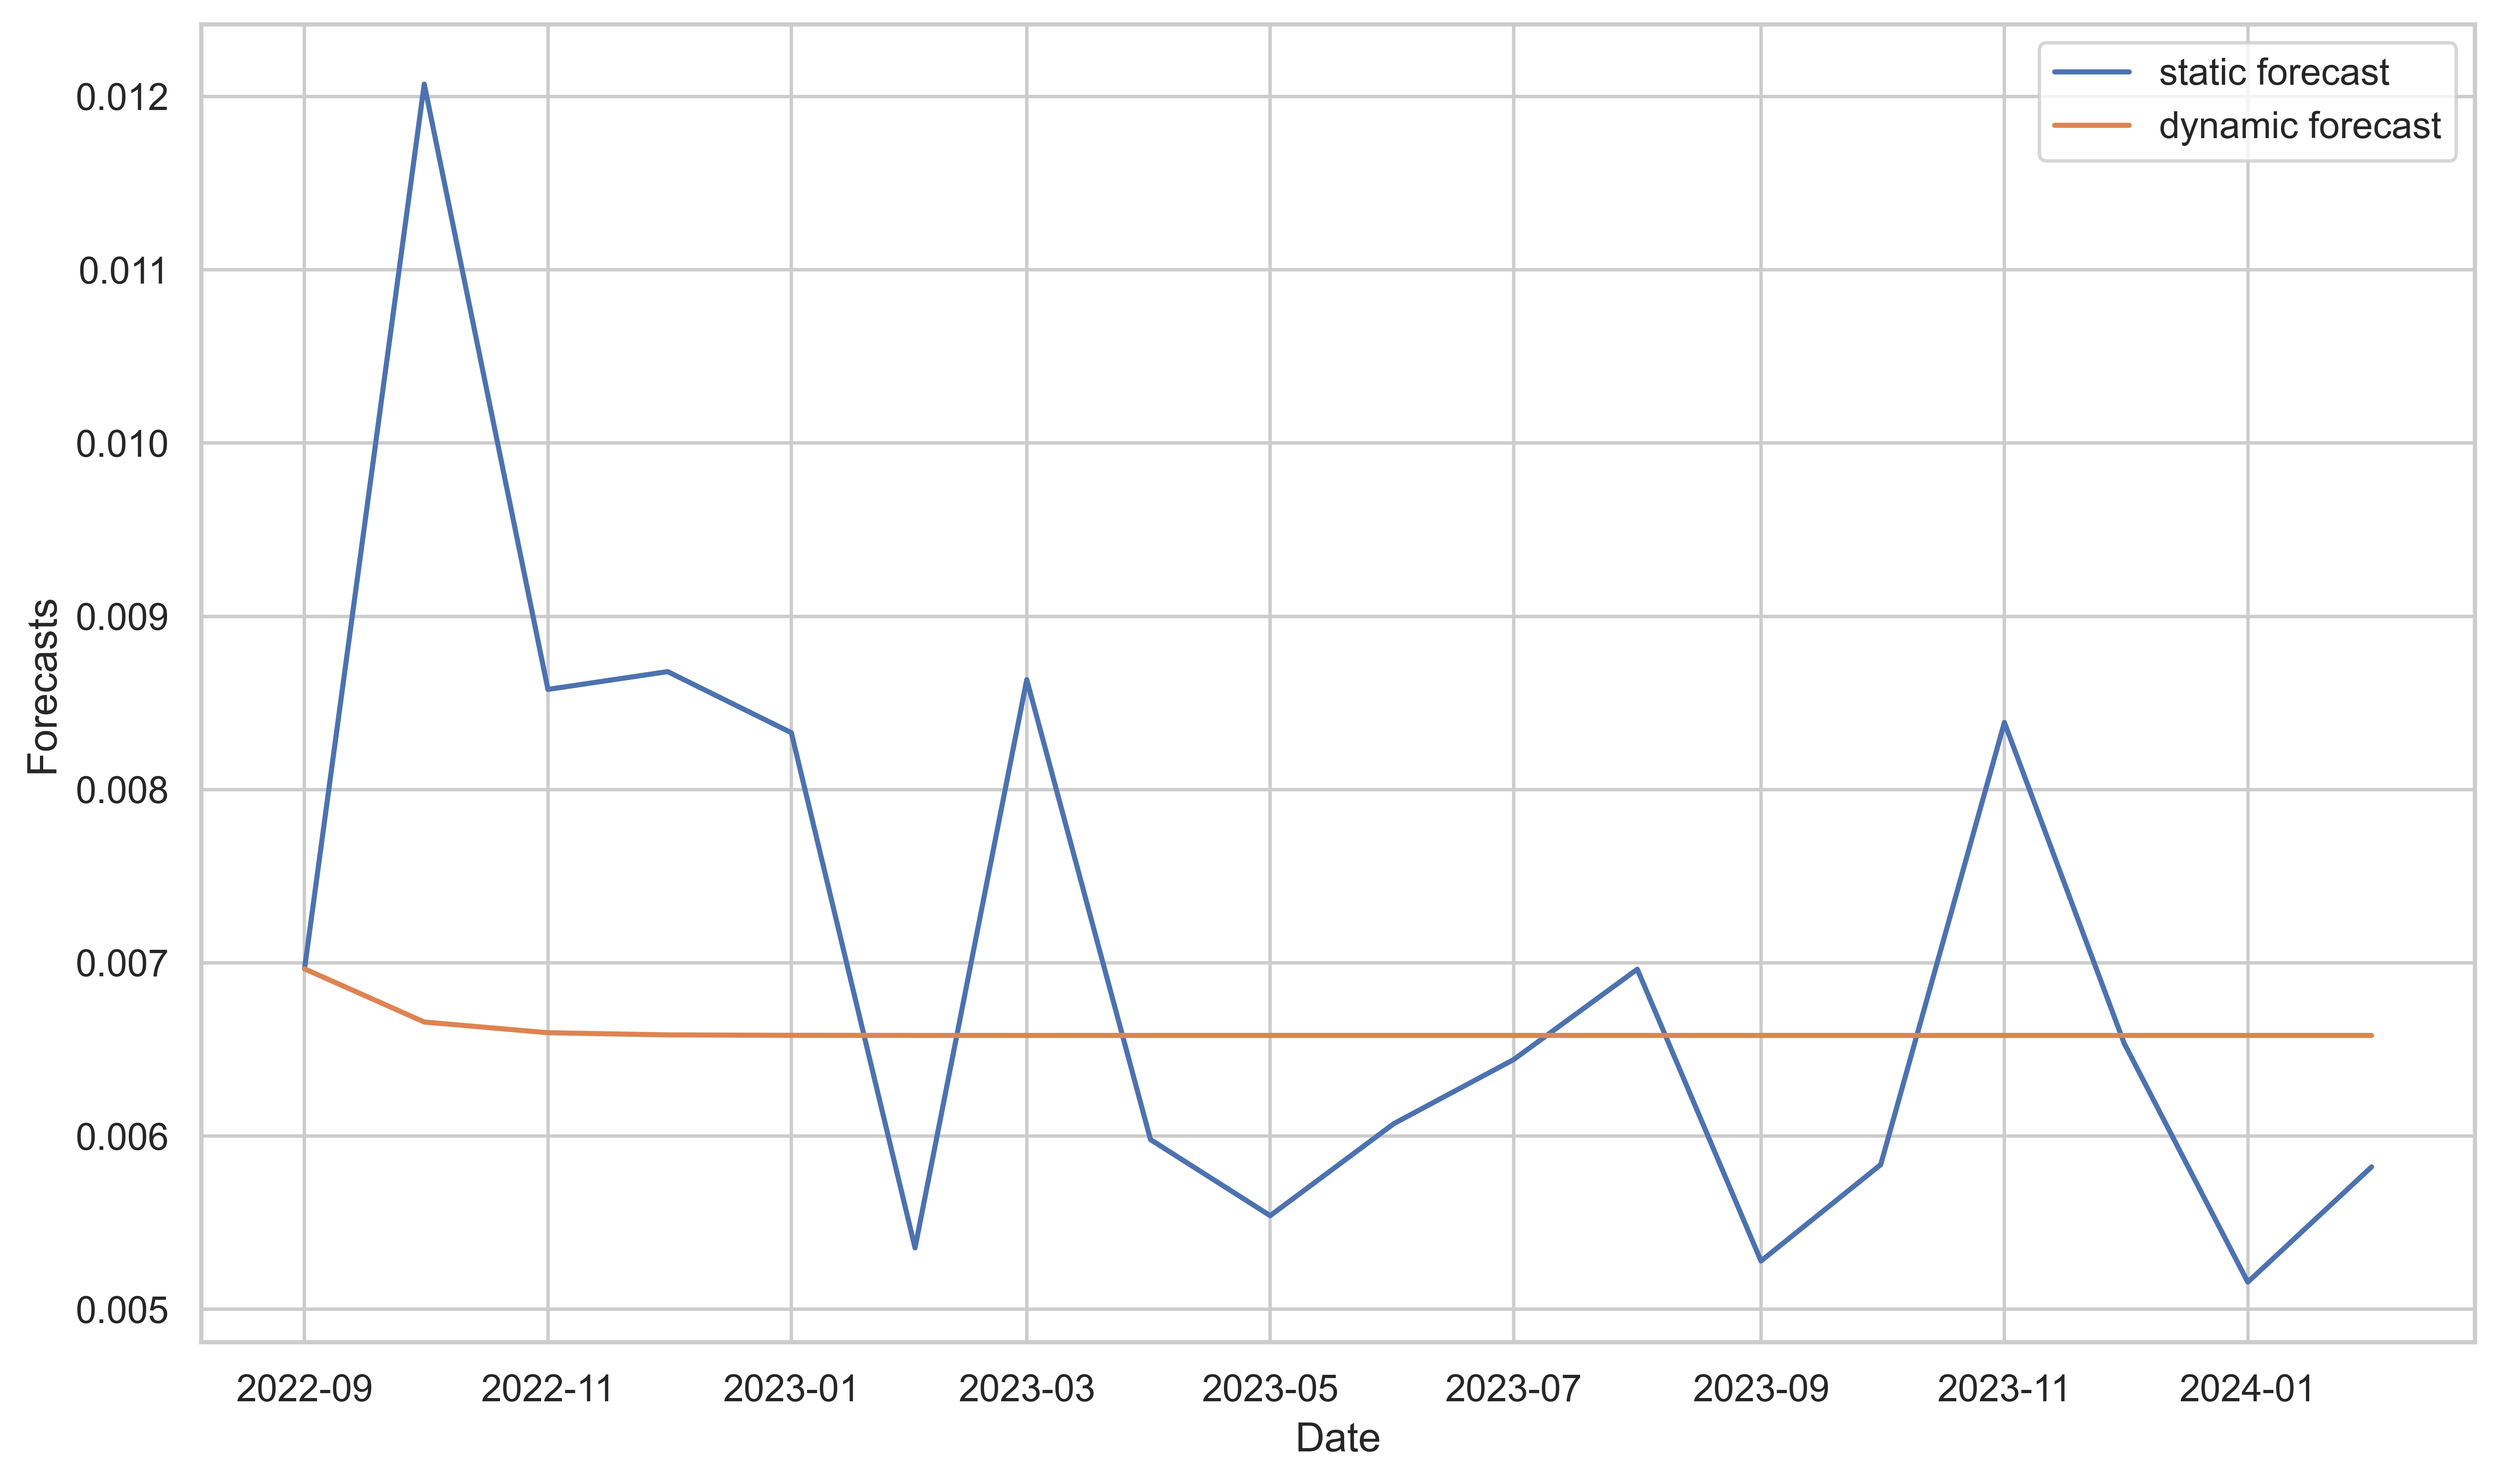

In [511]:
plt.figure(1, dpi = 600)
plt.plot(cvar_rjpy_stat, label='static forecast')
plt.plot(cvar_rjpy_dyn, label='dynamic forecast')

plt.xlabel('Date')
plt.ylabel('Forecasts')
plt.legend()
plt.show()

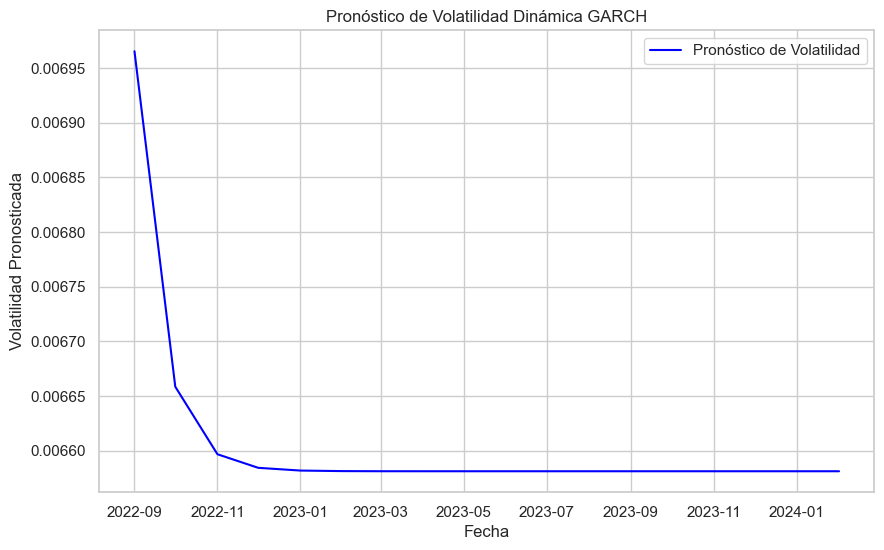

In [512]:
import matplotlib.pyplot as plt

# Asumiendo que 'forecasts_res' contiene tus resultados de varianza pronosticada y 'cvar_rjpy_dyn' contiene las predicciones dinámicas
plt.figure(figsize=(10, 6))
plt.plot(cvar_rjpy_dyn, label='Pronóstico de Volatilidad', color='blue')
plt.title('Pronóstico de Volatilidad Dinámica GARCH')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad Pronosticada')
plt.legend()
plt.grid(True)
plt.show()


## ACF Y PACF

In [513]:
pip install statsmodels matplotlib


Note: you may need to restart the kernel to use updated packages.


<Figure size 1200x500 with 0 Axes>

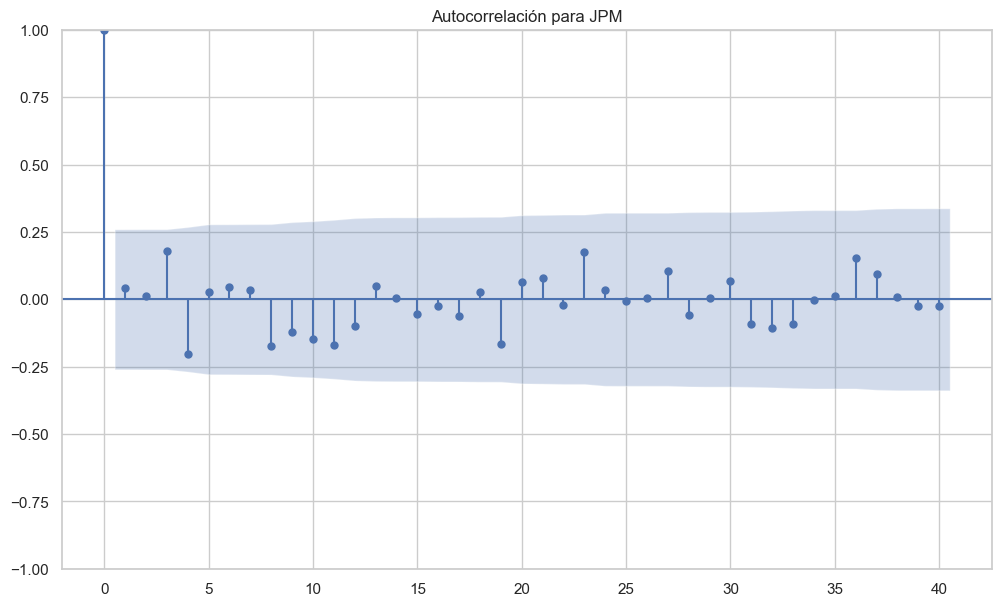

<Figure size 1200x500 with 0 Axes>

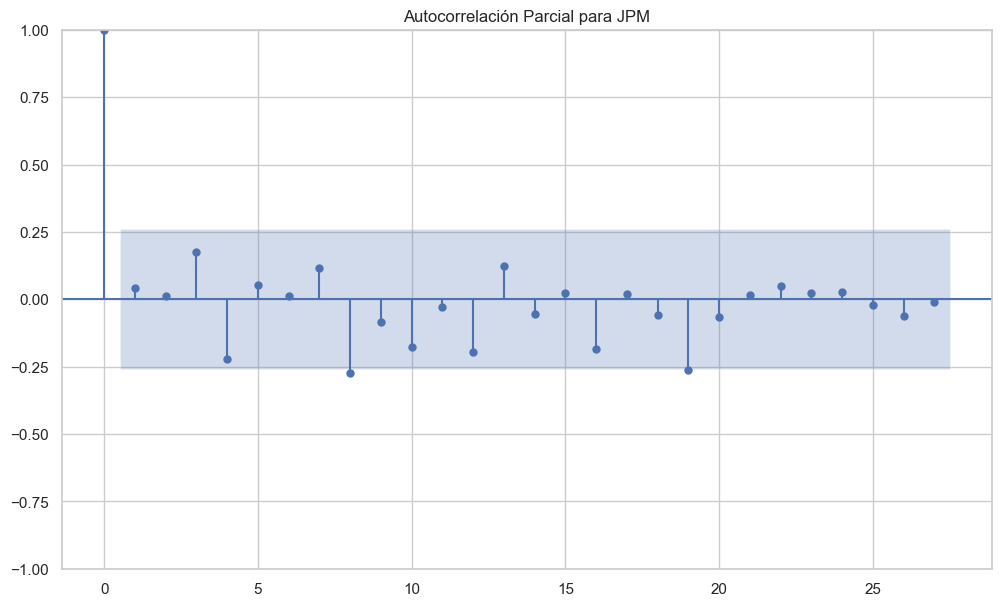

In [514]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd


returns_jpm = returns['JPM'].dropna()

plt.figure(figsize=(12, 5))
plot_acf(returns_jpm, lags=40, alpha=0.05) 
plt.title('Autocorrelación para JPM')
plt.grid(True)
plt.show()

num_data_points = len(returns_jpm)  
max_lags = num_data_points // 2 - 1 

# Graficando la función de autocorrelación parcial (PACF)
plt.figure(figsize=(12, 5))
plot_pacf(returns_jpm, lags=max_lags, alpha=0.05, method='ywm')
plt.title('Autocorrelación Parcial para JPM')
plt.grid(True)
plt.show()

# CAPM

In [515]:
!pip install pandas_datareader 

DESCARGAR LOS DATOS DEL MERCADO PARA IDENTIFICAR LA SENSIBILIDAD DE LA ACCIÓN CON LOS MOVIMIENTOS DEL MERCADO:

In [695]:
monthly_prices = prices[['JPM','SPY']]
monthly_prices.head()

Ticker,JPM,SPY
Date,,
2019-05-31,91.390678,254.007767
2019-06-30,96.427696,270.368195
2019-07-31,100.050186,275.790924
2019-08-31,95.425262,271.173248
2019-09-30,102.226463,275.178925


In [747]:
returns.head()

Ticker,ABBV,AVGO,AXP,BA,BTC,CAT,CVX,JPM,KO,LYB,SPY,TSLA,VZ
Date,,,,,,,,,,,,,
2020-11-01,0.245642,0.148586,0.305188,0.459312,0.003461,0.112068,0.254389,0.213523,0.073658,0.243243,0.108777,0.462736,0.071297
2020-12-01,0.024575,0.090318,0.019563,0.015899,0.001099,0.048563,-0.017061,0.077961,0.071124,0.089897,0.032646,0.243252,-0.027479
2021-01-01,-0.043584,0.037658,-0.038459,-0.092824,-0.003052,0.004505,0.008881,0.012591,-0.121991,-0.064368,-0.005971,0.124506,-0.068085
2021-02-01,0.063623,0.042997,0.167507,0.091766,-0.008675,0.186987,0.173709,0.152016,0.017445,0.202075,0.027806,-0.148740,0.020858
2021-03-01,0.004455,-0.013216,0.045690,0.201453,-0.004733,0.074069,0.062713,0.034382,0.075934,0.009312,0.041987,-0.011207,0.051537


<Axes: xlabel='Date'>

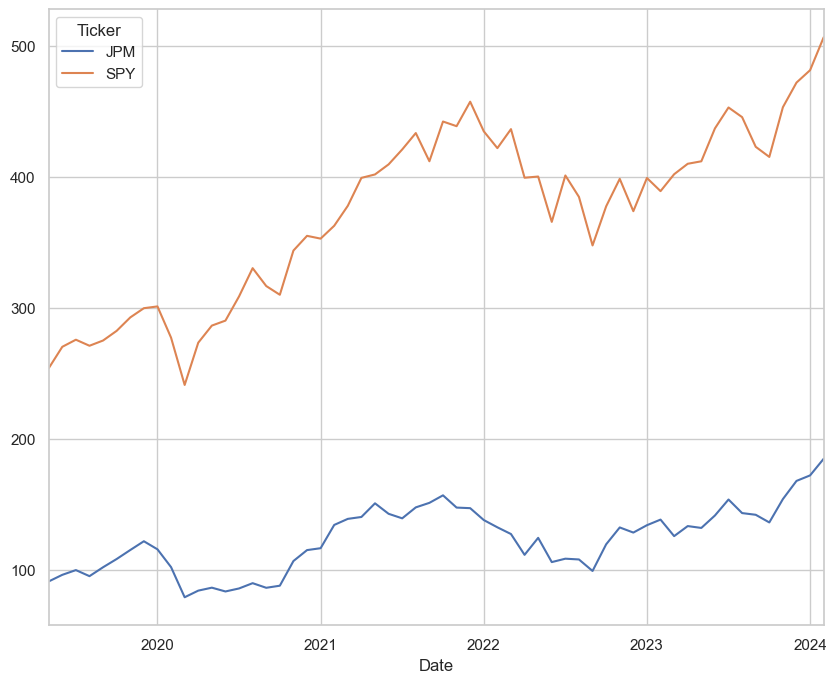

In [696]:
monthly_prices.plot(label = 'JPM', figsize=(10,8))

In [700]:
returns.columns

Index(['ABBV', 'AVGO', 'AXP', 'BA', 'BTC', 'CAT', 'CVX', 'JPM', 'KO', 'LYB',
       'SPY', 'TSLA', 'VZ'],
      dtype='object', name='Ticker')

In [716]:
X = returns['SPY']
y_JPM = returns['JPM']
y_ABBV, y_AVGO, y_AXP, y_BA, y_BTC, y_CAT, y_CVX, y_KO, y_LYB, y_TSLA, y_VZ = returns['ABBV'], returns['AVGO'], returns['AXP'],returns['BA'], returns['BTC'], returns['CAT'], returns['CVX'], returns['KO'], returns['LYB'], returns['TSLA'], returns['VZ']

In [702]:
X1 = sm.add_constant(X)
model = sm.OLS(y_JPM, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    JPM   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     35.88
Date:                Wed, 22 May 2024   Prob (F-statistic):           5.88e-07
Time:                        19:57:44   Log-Likelihood:                 57.295
No. Observations:                  40   AIC:                            -110.6
Df Residuals:                      38   BIC:                            -107.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0069      0.010      0.710      0.4

In [750]:
from scipy import stats
slope, intercept, r_value_JPM, p_value, std_err = stats.linregress(X, y_JPM)
print(slope)
beta_JPM = slope

1.0961644741420242


In [751]:
r_value_JPM

0.6968731260638378

In [765]:
r2_JPM = r_value_JPM**2

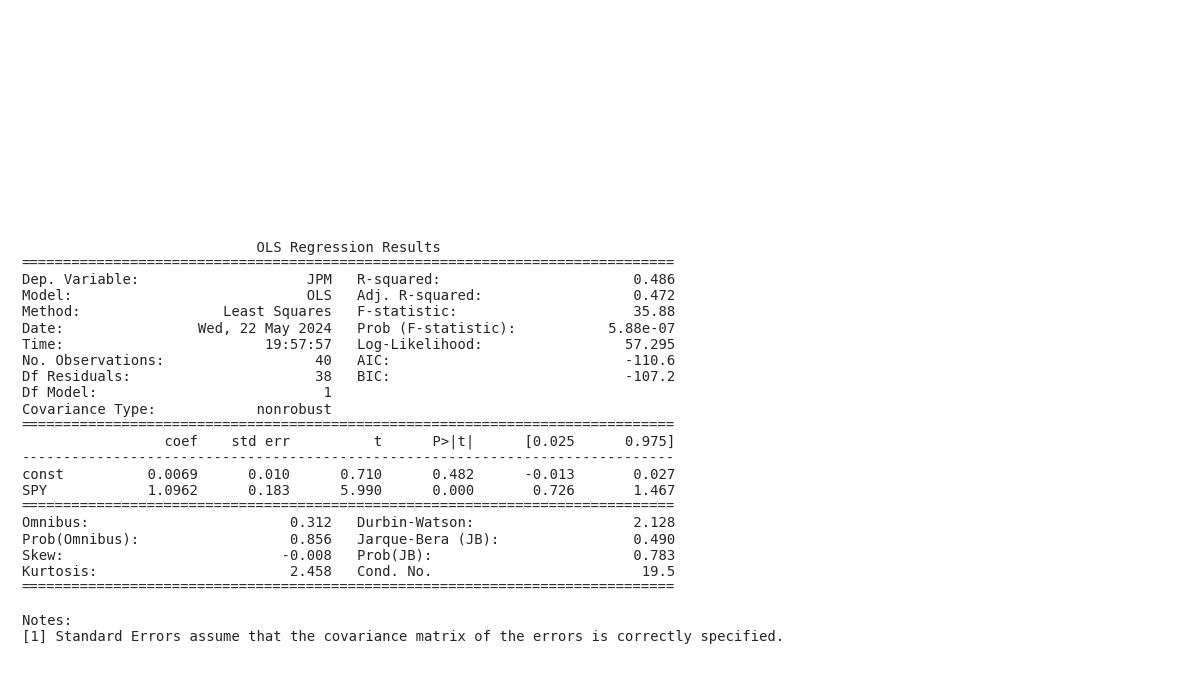

In [706]:
# save OLS Regression Results as a PNG
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(results.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('output.png')

# ABBV CAPM

In [707]:
X_ABBV = sm.add_constant(X)
model = sm.OLS(y_ABBV, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   ABBV   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     7.382
Date:                Wed, 22 May 2024   Prob (F-statistic):            0.00987
Time:                        19:58:33   Log-Likelihood:                 52.307
No. Observations:                  40   AIC:                            -100.6
Df Residuals:                      38   BIC:                            -97.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0169      0.011      1.535      0.1

In [753]:
from scipy import stats
slope, intercept, r_value_ABBV, p_value, std_err = stats.linregress(X, y_ABBV)
print(slope)
beta_ABBV = slope

0.5632486559950113


In [754]:
r_value_ABBV

0.40330933450562584

In [762]:
r2_ABBV = r_value_ABBV ** 2

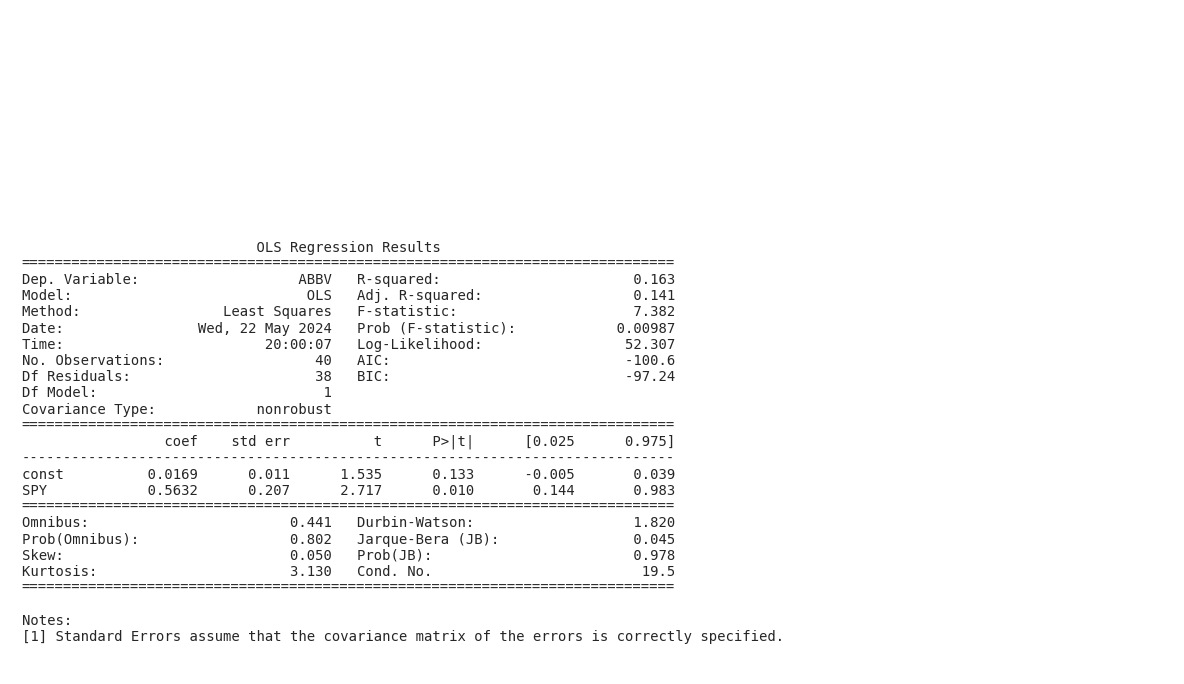

In [710]:
# save OLS Regression Results as a PNG
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(results.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('output.png')

# AXP

In [717]:
X1 = sm.add_constant(X)
model = sm.OLS(y_AXP, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    AXP   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     39.74
Date:                Wed, 22 May 2024   Prob (F-statistic):           2.18e-07
Time:                        20:03:18   Log-Likelihood:                 52.998
No. Observations:                  40   AIC:                            -102.0
Df Residuals:                      38   BIC:                            -98.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0099      0.011      0.915      0.3

In [755]:
from scipy import stats
slope_AXP, intercept, r_value_AXP, p_value, std_err = stats.linregress(X, y_AXP)
print(slope)
beta_AXP = slope

0.5632486559950113


In [756]:
r_value_AXP

0.7149927580843791

In [764]:
r2_AXP = r_value_AXP ** 2
r2_AXP

0.5112146441131075

# BA

In [721]:
X1 = sm.add_constant(X)
model = sm.OLS(y_BA, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     BA   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     22.56
Date:                Wed, 22 May 2024   Prob (F-statistic):           2.89e-05
Time:                        20:03:44   Log-Likelihood:                 33.202
No. Observations:                  40   AIC:                            -62.40
Df Residuals:                      38   BIC:                            -59.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0047      0.018     -0.264      0.7

In [757]:
from scipy import stats
slope, intercept, r_value_BA, p_value, std_err = stats.linregress(X, y_BA)
print(slope)
beta_BA = slope

1.587506781488498


In [758]:
r_value_BA

0.6103411692505437

In [768]:
r2_BA = r_value_BA ** 2
r2_BA

0.3725163428821208

# BTC

In [725]:
X1 = sm.add_constant(X)
model = sm.OLS(y_BTC, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BTC   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                   0.01031
Date:                Wed, 22 May 2024   Prob (F-statistic):              0.920
Time:                        20:04:56   Log-Likelihood:                 155.95
No. Observations:                  40   AIC:                            -307.9
Df Residuals:                      38   BIC:                            -304.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.001     -1.395      0.1

In [759]:
from scipy import stats
slope, intercept, r_value_BTC, p_value, std_err = stats.linregress(X, y_BTC)
print(slope)
beta_BTC = slope

0.0015775563182187568


In [760]:
r_value_BTC

0.016470407557806405

In [761]:
r_value_BTC ** 2

0.0002712743251202463

# CAT

In [728]:
X1 = sm.add_constant(X)
model = sm.OLS(y_CAT, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CAT   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     35.40
Date:                Wed, 22 May 2024   Prob (F-statistic):           6.68e-07
Time:                        20:06:37   Log-Likelihood:                 47.165
No. Observations:                  40   AIC:                            -90.33
Df Residuals:                      38   BIC:                            -86.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0069      0.012      0.554      0.5

In [769]:
from scipy import stats
slope, intercept, r_value_CAT, p_value, std_err = stats.linregress(X, y_CAT)
print(slope)
beta_CAT = slope

1.4025687583230129


In [770]:
r_value_CAT

0.6944499882233136

In [771]:
r2_CAT = r_value_CAT

# CVX

In [731]:
X1 = sm.add_constant(X)
model = sm.OLS(y_CVX, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CVX   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     12.87
Date:                Wed, 22 May 2024   Prob (F-statistic):           0.000940
Time:                        20:07:49   Log-Likelihood:                 45.321
No. Observations:                  40   AIC:                            -86.64
Df Residuals:                      38   BIC:                            -83.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0151      0.013      1.155      0.2

In [732]:
from scipy import stats
slope, intercept, r_value_CVX, p_value, std_err = stats.linregress(X, y_CVX)
print(slope)
beta_CVX = slope

0.8856247919464632


In [772]:
r2_CVX = r_value_CVX ** 2
r_value_CVX, r2_CVX

(0.3193379747851459, 0.10197674213987849)

# JPM

# KO

In [735]:
X1 = sm.add_constant(X)
model = sm.OLS(y_KO, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     KO   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     13.15
Date:                Wed, 22 May 2024   Prob (F-statistic):           0.000841
Time:                        20:09:00   Log-Likelihood:                 66.535
No. Observations:                  40   AIC:                            -129.1
Df Residuals:                      38   BIC:                            -125.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0023      0.008      0.298      0.7

In [773]:
from scipy import stats
slope, intercept, r_value_KO, p_value, std_err = stats.linregress(X, y_KO)
print(slope)
beta_KO = slope

0.5267528958490633


In [774]:
r_value_KO

0.507039413882555

In [776]:
r2_KO = r_value_KO ** 2
r_value_KO, r2_KO

(0.507039413882555, 0.25708896723036495)

# LYB

In [738]:
model = sm.OLS(y_LYB, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    LYB   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     20.39
Date:                Wed, 22 May 2024   Prob (F-statistic):           5.96e-05
Time:                        20:09:58   Log-Likelihood:                 50.585
No. Observations:                  40   AIC:                            -97.17
Df Residuals:                      38   BIC:                            -93.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0049      0.011      0.431      0.6

In [777]:
from scipy import stats
slope, intercept, r_value_LYB , p_value, std_err = stats.linregress(X, y_LYB)
print(slope)
beta_LYB = slope

0.9772628807466304


In [787]:
stats.linregress(X, y_LYB)

LinregressResult(slope=0.9772628807466304, intercept=0.004943911651297301, rvalue=0.5909237084361249, pvalue=5.955323665983996e-05, stderr=0.21642878552356526, intercept_stderr=0.01147005198710028)

In [779]:
r2_LYB = r_value_LYB ** 2
r_value_LYB, r2_LYB

(0.5909237084361249, 0.3491908291919023)

# TSLA

In [741]:
model = sm.OLS(y_TSLA, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   TSLA   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     16.17
Date:                Wed, 22 May 2024   Prob (F-statistic):           0.000265
Time:                        20:11:16   Log-Likelihood:                 16.448
No. Observations:                  40   AIC:                            -28.90
Df Residuals:                      38   BIC:                            -25.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.027      0.026      0.9

In [781]:
from scipy import stats
slope, intercept, r_value_TSLA, p_value, std_err = stats.linregress(X, y_TSLA)
print(slope)
beta_LYB = slope

2.043462600856977


In [783]:
r2_TSLA = r_value_TSLA ** 2
r_value_TSLA, r2_TSLA

(0.5464060167665858, 0.29855953515872646)

# VZ

In [744]:
model = sm.OLS(y_VZ, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     VZ   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     4.315
Date:                Wed, 22 May 2024   Prob (F-statistic):             0.0446
Time:                        20:12:14   Log-Likelihood:                 59.226
No. Observations:                  40   AIC:                            -114.5
Df Residuals:                      38   BIC:                            -111.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0072      0.009     -0.780      0.4

In [785]:
from scipy import stats
slope, intercept, r_value_VZ, p_value, std_err = stats.linregress(X, y_VZ)
print(slope)
beta_VZ = slope

0.36224566972688405


In [786]:
r2_VZ = r_value_VZ **2
r_value_VZ, r2_VZ

(0.3193379747851459, 0.10197674213987849)

# MODELO REGRESIÓN LINEAL

In [524]:
df['JPM UN Equity Twitter Sentiment Daily Average'] = pd.to_numeric(df['JPM UN Equity Twitter Sentiment Daily Average'], errors='coerce')

In [586]:
combined_data.head()

,JPM UN Equity Twitter Sentiment Daily Average,JPM UN Equity Twitter Negative Sentiment Count,JPM UN Equity Twitter Positive Sentiment Count,JPM,SPY,gdp


In [539]:
combined_data['JPM UN Equity Twitter Sentiment Daily Average'] = combined_data['JPM UN Equity Twitter Sentiment Daily Average'].astype('float64')

In [540]:
combined_data.dtypes

JPM UN Equity Twitter Sentiment Daily Average     float64
JPM UN Equity Twitter Negative Sentiment Count     object
JPM UN Equity Twitter Positive Sentiment Count     object
JPM                                               float64
dtype: object

In [541]:
X = combined_data['JPM UN Equity Twitter Sentiment Daily Average']
y = combined_data['JPM']
X1 = sm.add_constant(X)

In [542]:
model = sm.OLS(y, X1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    JPM   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.2074
Date:                Sun, 12 May 2024   Prob (F-statistic):              0.651
Time:                        20:18:24   Log-Likelihood:                 63.190
No. Observations:                  57   AIC:                            -122.4
Df Residuals:                      55   BIC:                            -118.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

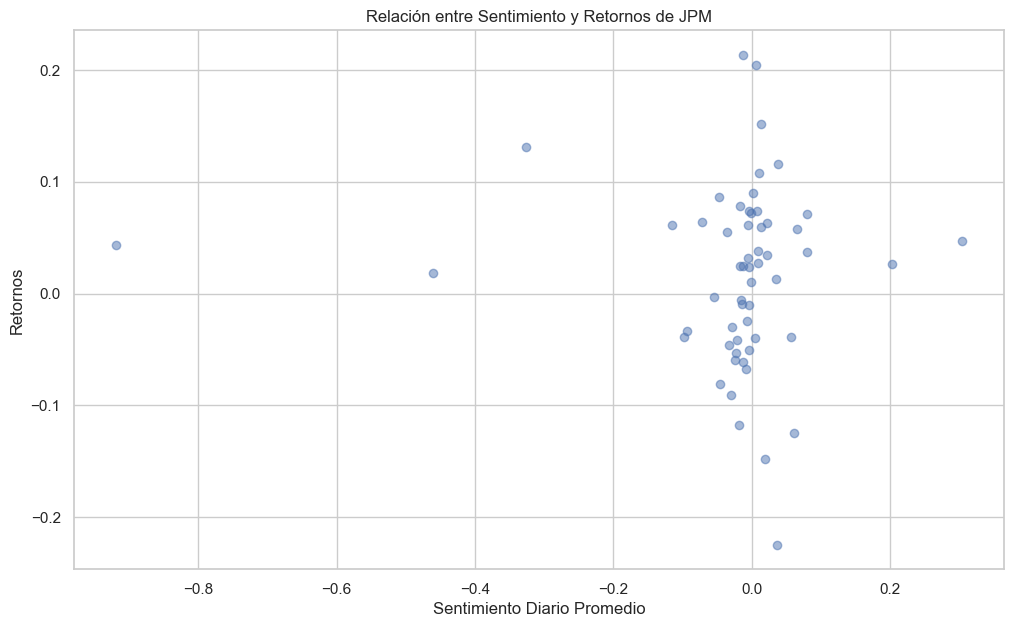

In [544]:
plt.scatter(combined_data['JPM UN Equity Twitter Sentiment Daily Average'], combined_data['JPM'], alpha=0.5)
plt.xlabel('Sentimiento Diario Promedio')
plt.ylabel('Retornos')
plt.title('Relación entre Sentimiento y Retornos de JPM')
plt.show()


# APLICAR MODELO 2:

In [546]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [551]:
X2 = combined_data[['JPM UN Equity Twitter Sentiment Daily Average', 'SPY']]


In [552]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [553]:
# Crear el modelo de Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Puedes ajustar más hiperparámetros según necesidad

# Entrenar el modelo
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [554]:
from sklearn.metrics import mean_squared_error

# Predecir los datos de prueba
y_pred = rf.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0026209849936494494


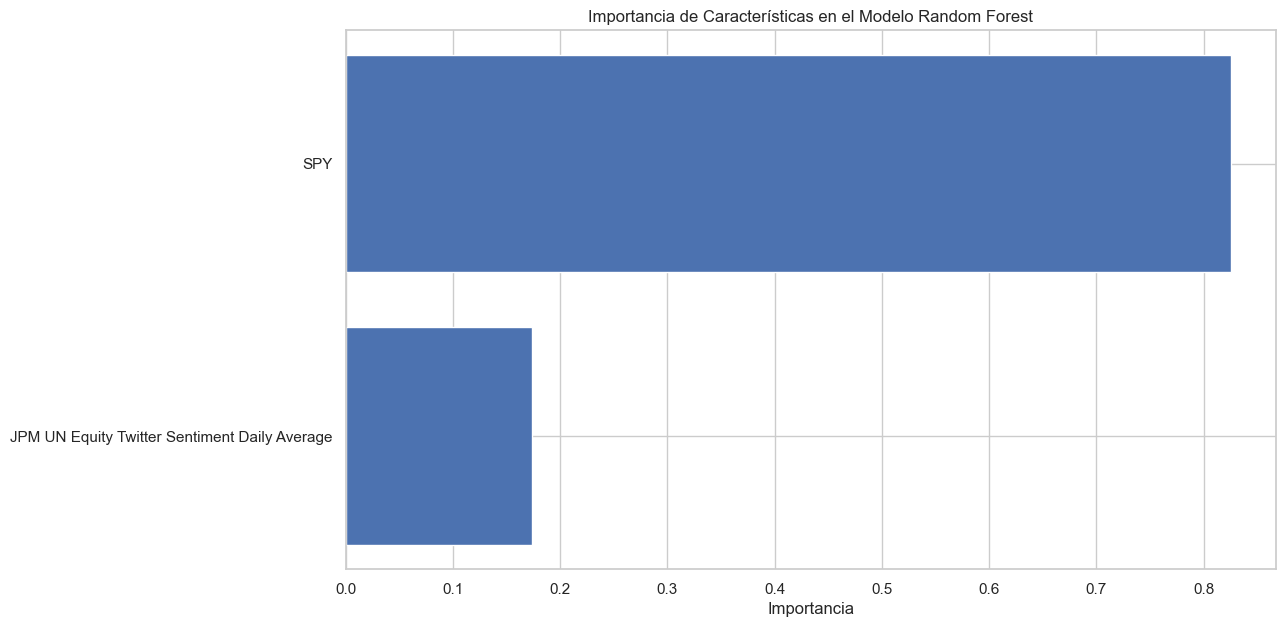

In [555]:
import matplotlib.pyplot as plt

# Obtener importancias de características
importances = rf.feature_importances_

# Visualizar importancias
plt.barh(['JPM UN Equity Twitter Sentiment Daily Average', 'SPY'], importances)
plt.xlabel('Importancia')
plt.title('Importancia de Características en el Modelo Random Forest')
plt.show()
